# Diabetes Predictor With Logistic Regression

## Context - From Kaggle
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## Motivation
In a nutshell, to familiarize myself with logistic regression.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("diabetes.csv")

## Doing my exploratory analysis

In [35]:
list(df)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [37]:
# Changing the columns name for readability and convenience
df.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [39]:
list(df)

['pregnant',
 'glucose',
 'bp',
 'skin',
 'insulin',
 'bmi',
 'pedigree',
 'age',
 'label']

In [40]:
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
df.tail()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [42]:
df.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [43]:
df.isnull().sum() # so no null values... but there may be missing values

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [44]:
df.head(20)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [45]:
print(df.columns.tolist())

['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']


In [46]:
# preciso separar as colunas entre as features e a target variable

In [48]:
feature_columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
x = df[feature_columns] # features (independent variables)
y = df.label # target variable (dependent variable)

In [55]:
# agora, separar set entre training vs testing set, MAS NÃO ESQUECER DE RANDOMIZAR A PARADA!!! Crucial!
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=16)

In [72]:
ytest

515    1
462    0
55     0
684    0
383    0
      ..
597    0
721    0
375    1
442    0
37     1
Name: label, Length: 154, dtype: int64

In [57]:
ytrain

171    1
222    0
565    0
576    0
152    1
      ..
321    1
581    0
121    0
238    1
681    1
Name: label, Length: 614, dtype: int64

## Implementando o modelo

In [59]:
# importando a classe do scikit do modelo de regressão logística
from sklearn.linear_model import LogisticRegression

In [169]:
logreg = LogisticRegression(random_state=16, max_iter=2000) # obs: max_iter baixo lança um warning!
# para referência, ler
# https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter

# fit model with data
logreg.fit(xtrain,ytrain)

LogisticRegression(max_iter=2000, random_state=16)

In [170]:
y_pred = logreg.predict(xtest)

In [171]:
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [172]:
new_df = pd.DataFrame()
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [173]:
new_df['prediction'] = y_pred

In [174]:
new_df

,prediction
0,1
1,0
2,0
3,0
4,0
...,...
149,0
150,0
151,1
152,0


In [175]:
ytest

515    1
462    0
55     0
684    0
383    0
      ..
597    0
721    0
375    1
442    0
37     1
Name: label, Length: 154, dtype: int64

In [176]:
new_df['actual'] = ytest.tolist()

In [177]:
new_df.actual[0]

1

## Select rows that satisfy my condition...
Here I want to compare rows that predict was right vs wrong. So I want to get amount of correct rows and divide by total rows.

In [178]:
# usando loc para comparar o que queremos... e já metendo o shape para pegar a Q rows... e já dividindo para pegar a proporção
accuracy = new_df.loc[new_df['actual'] == new_df['prediction']].shape[0] / new_df.shape[0]
print("A acurácia do modelo foi de:")
print(accuracy)

A acurácia do modelo foi de:
0.8181818181818182


## Analisando a acurácia do modelo

In [191]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(ytest, y_pred))
# poderíamos fazer assim também:
print(classification_report(ytest, y_pred, target_names = target_names))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       102
           1       0.82      0.60      0.69        52

    accuracy                           0.82       154
   macro avg       0.82      0.76      0.78       154
weighted avg       0.82      0.82      0.81       154

                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       102
   with diabetes       0.82      0.60      0.69        52

        accuracy                           0.82       154
       macro avg       0.82      0.76      0.78       154
    weighted avg       0.82      0.82      0.81       154



## Precisão
Precisão significa o quanto as previsões do nosso modelo são corretas. Ou seja, 82% do tempo ele preveu que o cara tem diabetes quando ele REALMENTE tem diabetes. Ou seja, acertou 82% das vezes.

## Recall


## Analisando os resultados usando uma Confusion Matrix

In [180]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(ytest, y_pred)
cnf_matrix

array([[95,  7],
       [21, 31]], dtype=int64)

Aqui pegamos uma confusion matrix na forma de array. É 2x2 pq temos um classificador binário (tem ou não tem diabetes). Valores na diagonal representam previsões corretas (aqui é complicado de enxergar porque é 2x2, mas olhe mais embaixo para entender a confusion matrix).

## Usando um heatmap para analisar a confusion matrix

Text(0.5, 15.0, 'Predicted label')

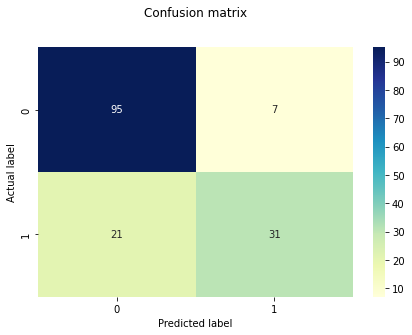

In [192]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Coisas para estudar:

Precision

Recall

ROC Curve (Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity)

AUC (area under curve)

sigmoid function

maximum likelihood